# The Sparks Foundation- Data Science and Business Analytics Internship

# TASK 2 - Prediction using Unsupervised Machine Learning

Author : Rahul kumar

From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually

Dataset: https://bit.ly/3kXTdox

In [1]:
# Importing the required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#importing Kmean algorithem
from sklearn.cluster import KMeans

# To ignore the warnings if any in program
import warnings as wg
wg.filterwarnings("ignore")

In [2]:
# Read the csv dataset
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Visuallization Of Data

In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

# Finding the optimum number of clusters in dataset

As it is unsupervise learning so we will drop Label (species) column from dataset

In [8]:
iris = pd.DataFrame(df)
# here we are droping two columns names Species and Id 
iris_dataframe = iris.drop(columns= ['Species' ,'Id'] )
print(iris_dataframe.head())
print(iris_dataframe.tail())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8


To find optimum number of cluster we have to use elbow method

In elbow method, the number of clusters are varied within a certain range of value.

For each value, within-cluster sum of square value is calculated and stored in some list.

These value are then plotted against the range of number of clusters used before.

The location of bend in the graph indicates the appropiate number of clusters.

In [9]:
# Calculating the within-cluster sum of square
#creating an arrary of withing_cluster_sum_of_square
within_cluster_sum_of_square = []

clusters_range = range(1,8)
#here including 1(lower limit ) excluding 8(upper limit)
#here we are using k mean clusering. In k mean clustering algorithem find k number of centroid (minimum as possible)
#and then plot set of data around them as nearrest as possible by using sum of square method

for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_dataframe)
    within_cluster_sum_of_square.append(km.inertia_)

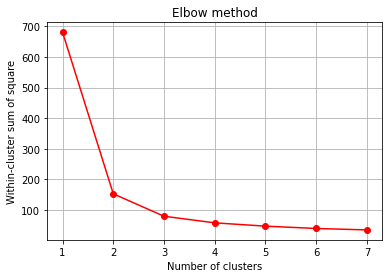

In [24]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, within_cluster_sum_of_square, 'go-', color='r')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

# Applying K-mean clustering on data

In [12]:
#Here we are importing KMean clustering 
#Doing 500 number if iteration aand taking number of cluster is 3
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_dataframe)

# Visualization of the clusters

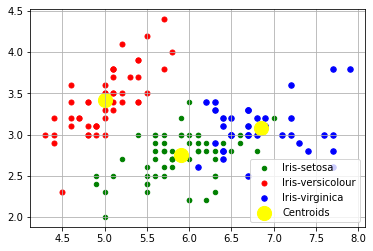

In [26]:
#Here in x selecting all the rows and column number 1,2,3,4 from iris_df 
x = iris_dataframe.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 20, c = 'green', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 30, c = 'blue', label = 'Iris-virginica')
# Plotting the cluster centers
#this give us center or centroid of cluastering
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()


# Thank you